In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
import re
from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv('raw_data.csv', index_col=0)

df.head()

,Title,Shop_Name,Is_Ad,Star_Rating,Num_Reviews,Price,Is_Bestseller,Num_Sales,Num_Basket,Description,Days_to_Arrival,Cost_Delivery,Returns_Accepted,Dispatched_From,Num_Images,Category
0,"Happy birthday card, Bird birthday card, Natur...",279,1,5,"2,391",4.99,1.0,"14,319",20,Each piece at Chau Art is originally hand desi...,3.0,0.99,1,United Kingdom,1,birthday card
1,"Carousel Happy Birthday Card, Handmade Laser C...",1689,1,5,"1,728",5.99,1.0,"15,066",0,POSTAGE: UK - From 5 Sept 2020 all orders will...,6.0,2.95,1,United Kingdom,1,birthday card
2,FLOWER BIRTHDAY CARD | Birthday Card for Her |...,348,1,5,97,2.30,1.0,"1,041",20,Flower birthday card featuring a pink orchid o...,6.0,1.00,0,United Kingdom,3,birthday card
3,"Personalized Leather Card Holder, Black red bl...",991,1,4.5,"1,345",25.19,1.0,"11,375",20,▲ Croc embossed Genuine Leather Personalised C...,4.0,3.99,0,United Kingdom,10,birthday card
4,"Among Us Birthday Card - It's Your Birthday, S...",1982,1,5,24,2.95,1.0,843,20,"Among Us Birthday Card - Its Your Birthday, Se...",4.0,1.00,1,United Kingdom,8,birthday card


## Data Exploration Roadmap

* drop category column 


* Describe data - will get numeric values 
* df.shape 
* value_counts 
* check out NaNs
* group by shop names to see unique shops 
    * Price, days to arrival, cost delivery, num images for top-num sales shops 


* bar graph for is_ad
* bar graph for star_rating -> bucket star count 
* bar graph for is_bestseller
* bar graph for numbasket
* bar graph for returns accepted 


* Histogram of num reviews
* Histogram of price 
* Histogram of num sales 
* Histogram days to arrival 
* Histogram of delivery cost 
* Histogram for num images 


* value_counts for delivery country 

* description/ title feature engineering? 

### Price- Specific Exploration

* Price for ad vs. not ad 
* Price for star rating 
* Price for num reviews
* Price for image count 
* Price for bestseller 
* Price for num sales 
* Price for delivery cost 
* Correlation heatmap 

In [3]:
df = df.drop(['Category'], axis=1)

In [4]:
df.shape

(14731, 15)

In [5]:
df.dtypes

Title                object
Shop_Name             int64
Is_Ad                 int64
Star_Rating          object
Num_Reviews          object
Price               float64
Is_Bestseller       float64
Num_Sales            object
Num_Basket            int64
Description          object
Days_to_Arrival     float64
Cost_Delivery       float64
Returns_Accepted      int64
Dispatched_From      object
Num_Images            int64
dtype: object

In [6]:
df.isnull().sum()

Title                  0
Shop_Name              0
Is_Ad                  0
Star_Rating          915
Num_Reviews          440
Price                543
Is_Bestseller       4640
Num_Sales              0
Num_Basket             0
Description            0
Days_to_Arrival     2642
Cost_Delivery         57
Returns_Accepted       0
Dispatched_From       89
Num_Images             0
dtype: int64

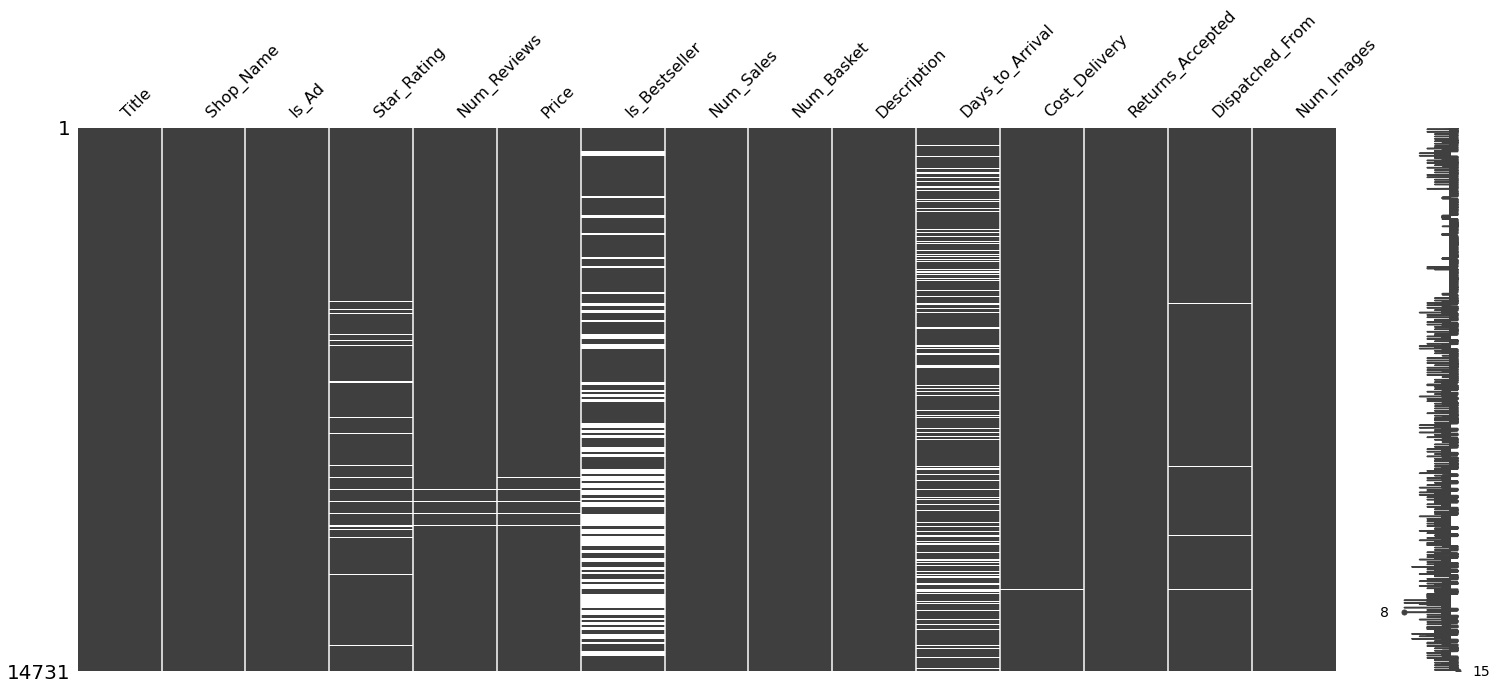

In [7]:
msno.matrix(df)
plt.show()

In [8]:
df.dropna(subset = ["Price"], inplace=True)
df.shape

(14188, 15)

In [9]:
df.isnull().sum()

Title                  0
Shop_Name              0
Is_Ad                  0
Star_Rating          372
Num_Reviews            0
Price                  0
Is_Bestseller       4442
Num_Sales              0
Num_Basket             0
Description            0
Days_to_Arrival     2529
Cost_Delivery         49
Returns_Accepted       0
Dispatched_From       80
Num_Images             0
dtype: int64

In [10]:
df.dtypes

Title                object
Shop_Name             int64
Is_Ad                 int64
Star_Rating          object
Num_Reviews          object
Price               float64
Is_Bestseller       float64
Num_Sales            object
Num_Basket            int64
Description          object
Days_to_Arrival     float64
Cost_Delivery       float64
Returns_Accepted      int64
Dispatched_From      object
Num_Images            int64
dtype: object

In [11]:
df['Num_Sales'] = df['Num_Sales'].str.replace(',', '')
df['Num_Sales'] = df['Num_Sales'].astype(int)

df['Num_Reviews'] = df['Num_Reviews'].str.replace(',', '')
df['Num_Reviews'] = df['Num_Reviews'].apply(lambda x: int(x) if x.isdigit() else np.nan)

In [12]:
digit = re.compile('\d+(\.\d+)?')

df['Star_Rating'] = df['Star_Rating'].apply(lambda x: float(x) if digit.match(str(x)) else np.nan)

In [18]:
df.dtypes

Title                object
Shop_Name             int64
Is_Ad                 int64
Star_Rating         float64
Num_Reviews           int64
Price               float64
Num_Sales             int32
Num_Basket            int64
Description          object
Days_to_Arrival     float64
Cost_Delivery       float64
Returns_Accepted      int64
Dispatched_From      object
Num_Images            int64
dtype: object

In [13]:
df.describe()

,Shop_Name,Is_Ad,Star_Rating,Num_Reviews,Price,Is_Bestseller,Num_Sales,Num_Basket,Days_to_Arrival,Cost_Delivery,Returns_Accepted,Num_Images
count,14188.000000,14188.000000,13814.000000,14188.000000,14188.000000,9746.0,14188.000000,14188.000000,11659.000000,14139.000000,14188.000000,14188.000000
mean,1054.087468,0.153440,4.988237,1239.809769,3.877365,1.0,9825.048139,2.370383,4.396861,0.643863,0.702847,3.121582
std,597.371892,0.360423,0.088152,1834.584792,3.207983,0.0,14178.466023,4.695587,20.817424,1.434525,0.457020,2.527543
min,1.000000,0.000000,1.000000,0.000000,0.500000,1.0,0.000000,0.000000,-346.000000,0.000000,0.000000,1.000000
25%,534.750000,0.000000,5.000000,188.000000,2.950000,1.0,1260.750000,0.000000,4.000000,0.000000,0.000000,1.000000
50%,1063.000000,0.000000,5.000000,668.000000,3.400000,1.0,4764.000000,0.000000,5.000000,0.000000,1.000000,2.000000
75%,1595.250000,0.000000,5.000000,1701.000000,3.950000,1.0,12540.500000,3.000000,7.000000,1.000000,1.000000,4.000000
max,2117.000000,1.000000,5.000000,26631.000000,133.000000,1.0,139336.000000,113.000000,19.000000,43.180000,1.000000,10.000000


In [14]:
df = df.drop(['Is_Bestseller'], axis=1)
df = df[df['Days_to_Arrival'] > 0]
df = df[df['Num_Basket'] <= 20]
df.shape

(11608, 14)

In [24]:
df.isnull().sum()

Title                 0
Shop_Name             0
Is_Ad                 0
Star_Rating         291
Num_Reviews           0
Price                 0
Num_Sales             0
Num_Basket            0
Description           0
Days_to_Arrival       0
Cost_Delivery         0
Returns_Accepted      0
Dispatched_From       0
Num_Images            0
dtype: int64

In [15]:
df[df['Star_Rating'].isnull()].head(10)

,Title,Shop_Name,Is_Ad,Star_Rating,Num_Reviews,Price,Num_Sales,Num_Basket,Description,Days_to_Arrival,Cost_Delivery,Returns_Accepted,Dispatched_From,Num_Images
65,"Violin Houseplant Card - Eco Greetings Card, G...",1677,1,NaN,0,3.50,4,0,A5 card features my Violin design with a lovel...,6.0,0.00,1,United Kingdom,2
87,Electric Guitar Houseplant Card - Eco Greeting...,1677,1,NaN,0,3.50,4,0,A5 card features my John Mayer signature Silve...,6.0,0.00,1,United Kingdom,2
133,Wurlitzer Piano Houseplant Card - Eco Greeting...,1677,1,NaN,0,3.50,4,1,A5 card features my vintage Wurlitzer electric...,6.0,0.00,1,United Kingdom,2
151,You're on Mute Card,1869,1,NaN,0,2.99,20,8,"Funny, high quality Youre on Mute Card that yo...",4.0,1.00,0,United Kingdom,1
366,Courage Greeting Card,103,1,NaN,0,2.95,0,0,"Sometimes in life we need a little bravery, bu...",6.0,0.99,0,United Kingdom,2
391,Courage Greeting Card,103,1,NaN,0,2.95,0,0,"Sometimes in life we need a little bravery, bu...",6.0,0.99,0,United Kingdom,2
458,Cute Dog Card / Cute Animal Card / Birthday C...,1957,1,NaN,0,3.49,1,0,It wasnt me...honest! Our lovely cute King Ch...,6.0,0.00,0,United Kingdom,1
523,Courage Greeting Card,103,1,NaN,0,2.95,0,0,"Sometimes in life we need a little bravery, bu...",6.0,0.99,0,United Kingdom,2
737,Personalised Giraffe Birthday Card! Cross-stit...,346,1,NaN,0,6.00,1,1,Gerald the Giraffe Cross-Stitch Personalised B...,4.0,0.00,0,United Kingdom,1
756,Happy Birthday - Abstract Leopard - Screen pri...,1743,1,NaN,0,3.00,8,1,"An original painterly screen print, hand print...",4.0,0.00,1,United Kingdom,6


-All ads
-Few sales
-Likely don't have any reviews
-Will create two datasets - one imputing the NaNs with 0, the other dropping the NaN records

* group by shop names to see unique shops 
    * Price, days to arrival, cost delivery, num images for top-num sales shops 

In [21]:
top_shops = df.groupby('Shop_Name').agg({'Num_Sales':'max','Price':'mean','Cost_Delivery':'mean','Num_Images': 'mean'}).sort_values('Num_Sales', ascending=False).reset_index()
top_shops.head(10)

,Shop_Name,Num_Sales,Price,Cost_Delivery,Num_Images
0,776,128763,2.625000,0.337222,2.944444
1,1633,80788,4.300000,0.990000,9.000000
2,362,80765,3.000000,0.491538,3.192308
3,1337,80763,4.490000,0.435000,4.750000
4,1751,80762,2.000000,0.495000,6.500000
5,155,80761,3.245968,0.387581,3.032258
6,1603,80747,5.000000,0.496857,3.647619
7,1103,80747,3.968023,0.397558,3.709302
8,1187,80382,4.990000,0.556667,3.333333
9,1317,79487,3.500000,0.589375,3.062500


* bar graph for is_ad
* bar graph for star_rating -> bucket star count 
* bar graph for numbasket
* bar graph for returns accepted 

In [25]:
df.columns

Index(['Title', 'Shop_Name', 'Is_Ad', 'Star_Rating', 'Num_Reviews', 'Price',
       'Num_Sales', 'Num_Basket', 'Description', 'Days_to_Arrival',
       'Cost_Delivery', 'Returns_Accepted', 'Dispatched_From', 'Num_Images'],
      dtype='object')

In [36]:
#Define a function that will show numbers above countplots
def show_values_on_bars(axis):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axis, np.ndarray):
        for idx, ax in np.ndenumerate(axis):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axis)

In [50]:
def plot_bar(x,y,title,xticks):
    ax = sns.barplot(x = x, y = y, palette = 'Set2')
    plt.title(title)
    plt.ylabel('Number of Listings')
    ax.set_xticklabels(xticks)
    show_values_on_bars(ax)

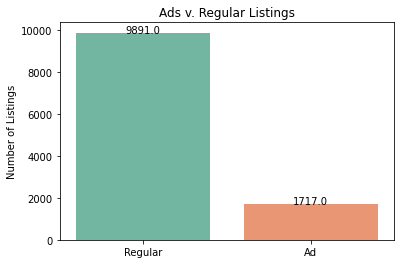

In [58]:
xticks_ad = ['Regular', 'Ad']
df_ad = df['Is_Ad'].value_counts()
plot_bar(df_ad.index, df_ad.values, 'Ads v. Regular Listings',xticks_ad)

plt.show()

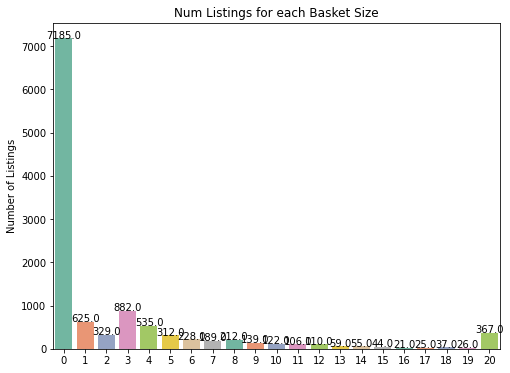

In [61]:
figure(figsize=(8, 6))
xticks_basket = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
df_basket = df['Num_Basket'].value_counts()
plot_bar(df_basket.index, df_basket.values, 'Num Listings for each Basket Size', xticks_basket)

plt.show()

In [65]:
df['Returns_Accepted'].value_counts()


1    8389
0    3219
Name: Returns_Accepted, dtype: int64

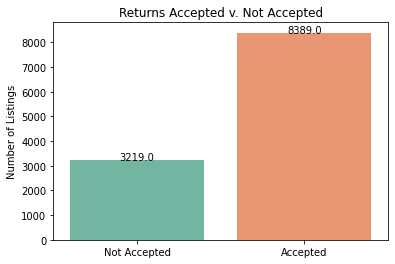

In [66]:
xticks_returns = ['Not Accepted', 'Accepted']
df_returns = df['Returns_Accepted'].value_counts()
plot_bar(df_returns.index, df_returns.values, 'Returns Accepted v. Not Accepted',xticks_returns)

plt.show()

In [70]:
df['Star_Rating'].value_counts(dropna=False)

5.0    11087
NaN      291
4.5      215
4.0       11
3.5        3
1.0        1
Name: Star_Rating, dtype: int64

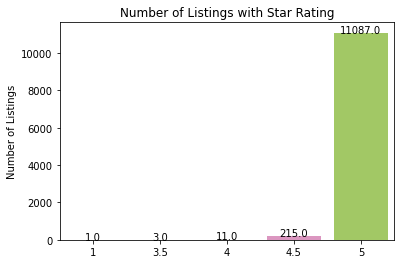

In [72]:
xticks_star = [1,3.5,4,4.5,5]
df_star = df['Star_Rating'].value_counts()
plot_bar(df_star.index, df_star.values, 'Number of Listings with Star Rating',xticks_star)

plt.show()

* Histogram of num reviews
* Histogram of price 
* Histogram of num sales 
* Histogram days to arrival 
* Histogram of delivery cost 
* Histogram for num images 